In [102]:
from matplotlib import pyplot as plt
from fbprophet.plot import plot_forecast_component, plot_yearly,plot_seasonality,predict_uncertainty
import pickle
import pandas as pd
import numpy as np
modelAdv = pd.read_pickle(('modelAdv.pckl') )
modelComf = pd.read_pickle(('modelComf.pckl') )
modelAffl = pd.read_pickle(('modelAffl.pckl') )
modelAll = pd.read_pickle(('modelAll.pckl') )
plt.autolayout : True


ImportError: cannot import name 'predict_uncertainty' from 'fbprophet.plot' (/Users/hansremy/opt/anaconda3/envs/metis/lib/python3.7/site-packages/fbprophet/plot.py)

In [106]:
test_dfAdv = pd.read_pickle(('testAdvLast.pckl') )
test_dfComf = pd.read_pickle(('testComfLast.pckl') )
test_dfAffl = pd.read_pickle(('testAfflLast.pckl') )
test_dfAll = pd.read_pickle(('testAllLast.pckl') )


In [107]:
forecastAdv = modelAdv.predict(test_dfAdv[:480])
forecastComf = modelComf.predict(test_dfComf[:480])
forecastAffl = modelAffl.predict(test_dfAffl[:480])
forecastAll = modelAll.predict(test_dfAll[:480])

In [101]:
punc = predict_uncertainty(modelAll, forecastAll)

NameError: name 'predict_uncertainty' is not defined

In [108]:
forecastAll

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01 00:30:00,0.197786,0.160859,0.228154,0.197786,0.197786,-0.002750,-0.002750,-0.002750,-0.045597,...,-0.001459,-0.001459,-0.001459,0.031537,0.031537,0.031537,0.0,0.0,0.0,0.195037
1,2014-01-01 01:30:00,0.197781,0.138954,0.207422,0.197781,0.197781,-0.024792,-0.024792,-0.024792,-0.070051,...,-0.001439,-0.001439,-0.001439,0.031529,0.031529,0.031529,0.0,0.0,0.0,0.172990
2,2014-01-01 02:30:00,0.197776,0.120816,0.188341,0.197776,0.197776,-0.044777,-0.044777,-0.044777,-0.091025,...,-0.001436,-0.001436,-0.001436,0.031521,0.031521,0.031521,0.0,0.0,0.0,0.153000
3,2014-01-01 03:30:00,0.197771,0.104932,0.172191,0.197771,0.197771,-0.059808,-0.059808,-0.059808,-0.103803,...,-0.001449,-0.001449,-0.001449,0.031513,0.031513,0.031513,0.0,0.0,0.0,0.137963
4,2014-01-01 04:30:00,0.197766,0.106391,0.173231,0.197766,0.197766,-0.056477,-0.056477,-0.056477,-0.100932,...,-0.001480,-0.001480,-0.001480,0.031505,0.031505,0.031505,0.0,0.0,0.0,0.141290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2014-01-20 19:30:00,0.195420,0.325781,0.391544,0.194119,0.196815,0.163983,0.163983,0.163983,0.116440,...,-0.001586,-0.001586,-0.001586,0.037318,0.037318,0.037318,0.0,0.0,0.0,0.359403
476,2014-01-20 20:30:00,0.195415,0.313013,0.377918,0.194110,0.196814,0.150463,0.150463,0.150463,0.100938,...,-0.001884,-0.001884,-0.001884,0.037337,0.037337,0.037337,0.0,0.0,0.0,0.345878
477,2014-01-20 21:30:00,0.195410,0.274444,0.343920,0.194101,0.196813,0.114250,0.114250,0.114250,0.064585,...,-0.002148,-0.002148,-0.002148,0.037355,0.037355,0.037355,0.0,0.0,0.0,0.309660
478,2014-01-20 22:30:00,0.195405,0.234412,0.299304,0.194092,0.196812,0.071890,0.071890,0.071890,0.021609,...,-0.002379,-0.002379,-0.002379,0.037373,0.037373,0.037373,0.0,0.0,0.0,0.267296


<Figure size 1728x720 with 0 Axes>

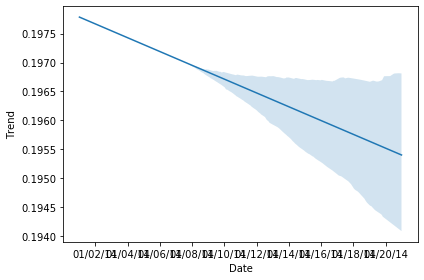

In [119]:
import matplotlib.dates as mdates

plt.figure(figsize=(24, 10))
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter("%D"))
ax.set_ylabel('Trend')
ax.set_xlabel('Date')


ax.plot(forecastAll['ds'], forecastAll['trend'], '-')
ax.fill_between(forecastAll['ds'],forecastAll['trend_lower'],forecastAll['trend_upper'],alpha=0.2)
plt.tight_layout()
plt.savefig('./Graphs/TrendforcastAll.png')
#ax.plot(x, y, 'o', color='tab:brown')

Text(0.5, 1.0, 'Model 1, trend')

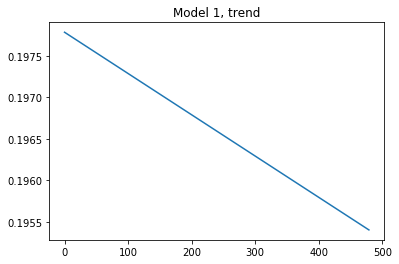

In [117]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.plot(forecastAll['trend'])
#ax.fill_between(forecastAll['trend'], forecastAll['trend_lower'] - forecastAll['trend'], forecastAll['trend_upper'] + forecastAll['trend'], alpha=0.2)

ax.set_title('Model 1, trend')

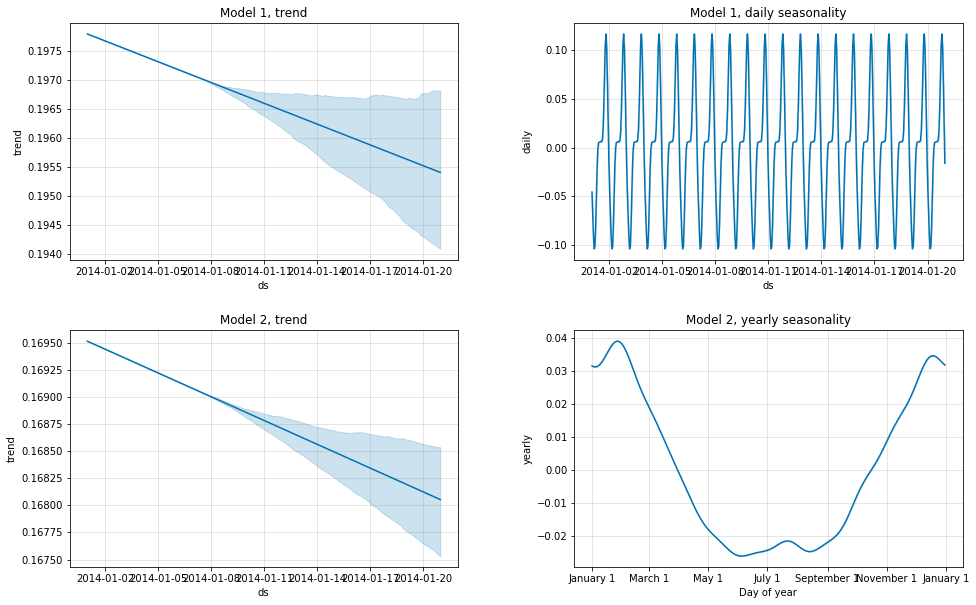

In [112]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(2, 2, 1)
plot_forecast_component(m=modelAll, fcst=forecastAll, name='trend', ax=ax1)
ax1.set_title('Model 1, trend')

ax2 = fig.add_subplot(2, 2, 2)
plot_forecast_component(m=modelAll, fcst=forecastAll, name='daily', ax=ax2)

ax2.set_title('Model 1, daily seasonality')

#ax2 = fig.add_subplot(2, 2, 2)
#plot_daily(m=modelAll, ax=ax2)
#ax2.set_title('Model 1, daily seasonality')

ax3 = fig.add_subplot(2, 2, 3)
plot_forecast_component(m=modelAdv, fcst=forecastAdv, name='trend', ax=ax3)

ax3.set_title('Model 2, trend')

ax4 = fig.add_subplot(2, 2, 4)
plot_yearly(m=modelAll, ax=ax4)
ax4.set_title('Model 2, yearly seasonality')

fig.subplots_adjust(wspace=0.3, hspace=0.3)

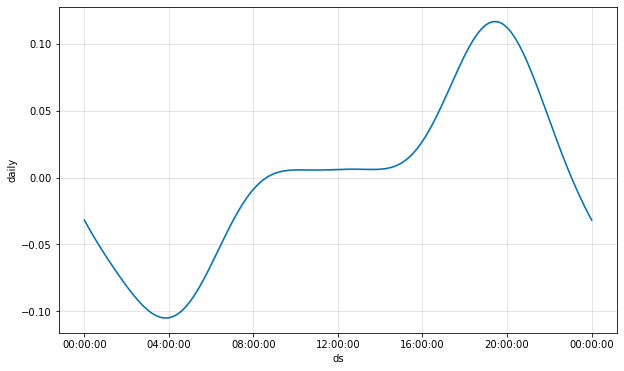

In [113]:
plot_seasonality(modelAll, 'daily', uncertainty = True)

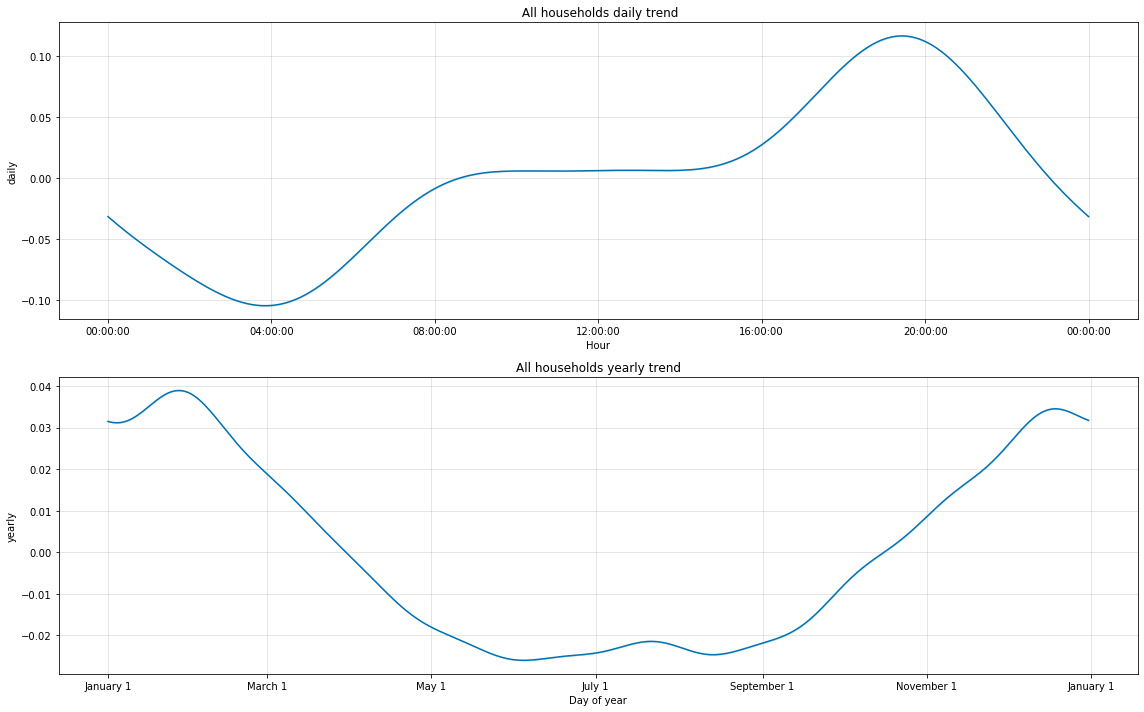

In [126]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(2, 1, 1)
plot_seasonality(modelAll, 'daily',uncertainty = True, ax=ax1)
ax1.set_title(' All households daily trend')
ax1.set_xlabel('Hour')
ax2 = fig.add_subplot(2,1,2)
plot_yearly(m=modelAll, ax=ax2)
ax2.set_title('All households yearly trend')
plt.tight_layout()
plt.savefig('./Graphs/ComponentsAll1.png')

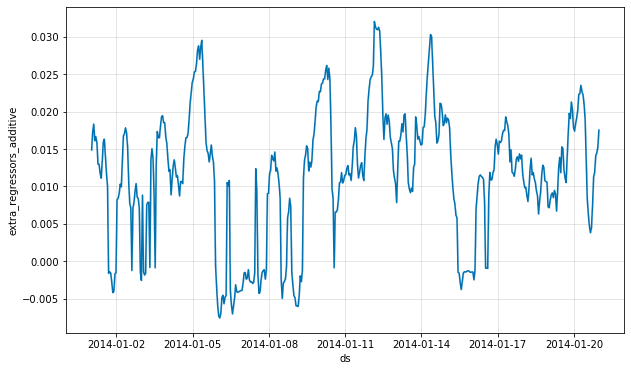

In [123]:
plot_forecast_component(m=modelAll, fcst=forecastAll, name='extra_regressors_additive')
ax.plot(test_dfAffl["ds"][:480], test_dfAffl["y"][:480],label='Actual values')

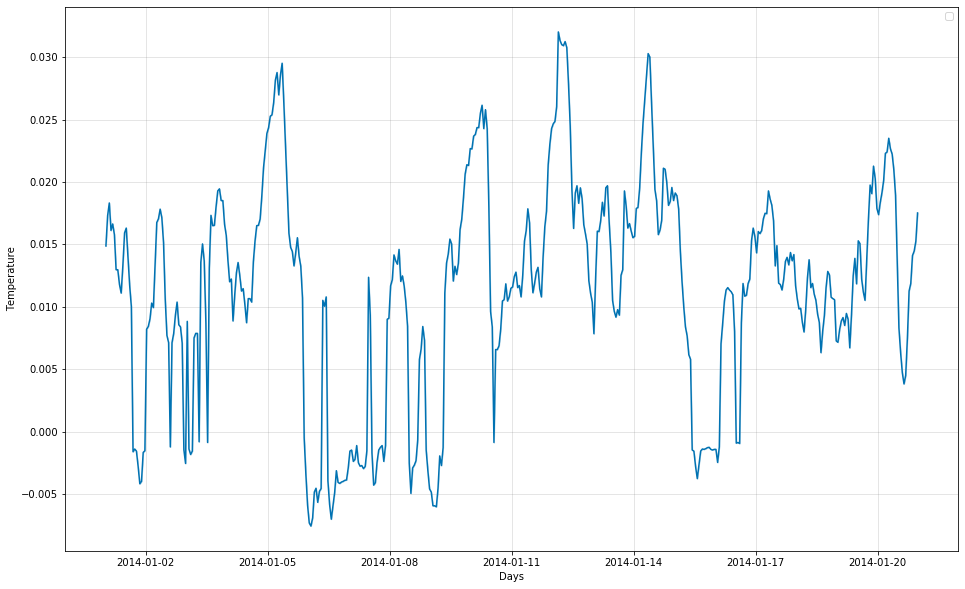

In [131]:


fig, ax = plt.subplots(figsize=(16, 10))




plot_forecast_component(m=modelAll, fcst=forecastAll, name='extra_regressors_additive',ax=ax)
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.savefig('graphs/PredTemp10Days.png',transparant = True,dpi = 100);

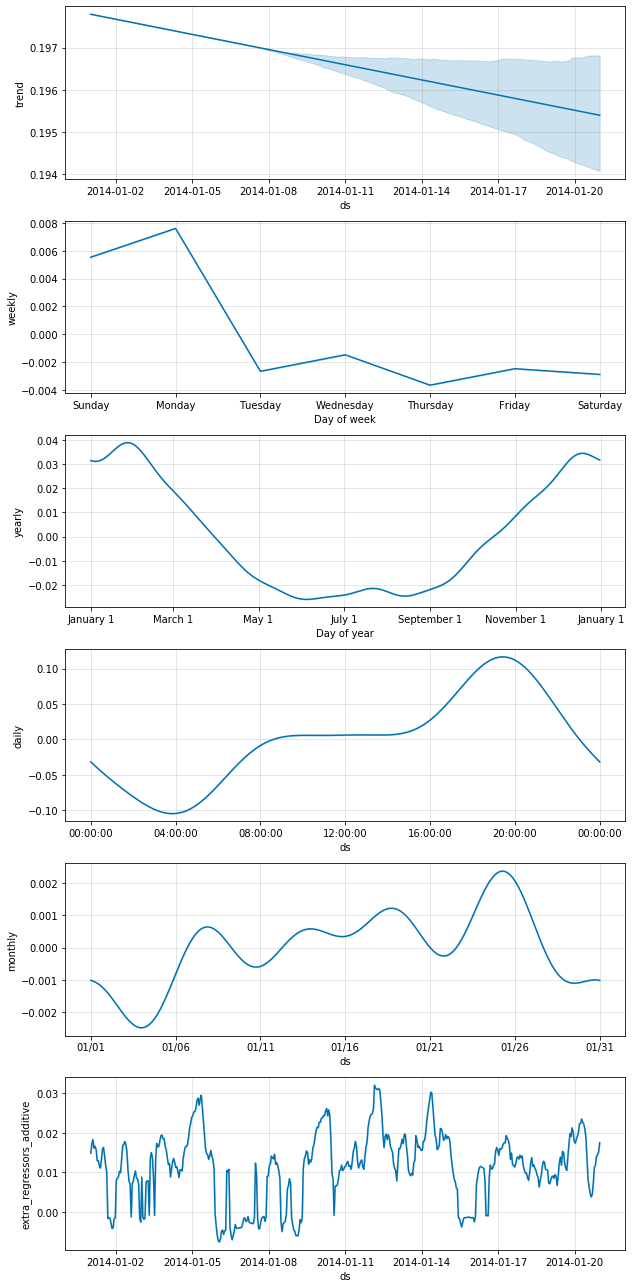

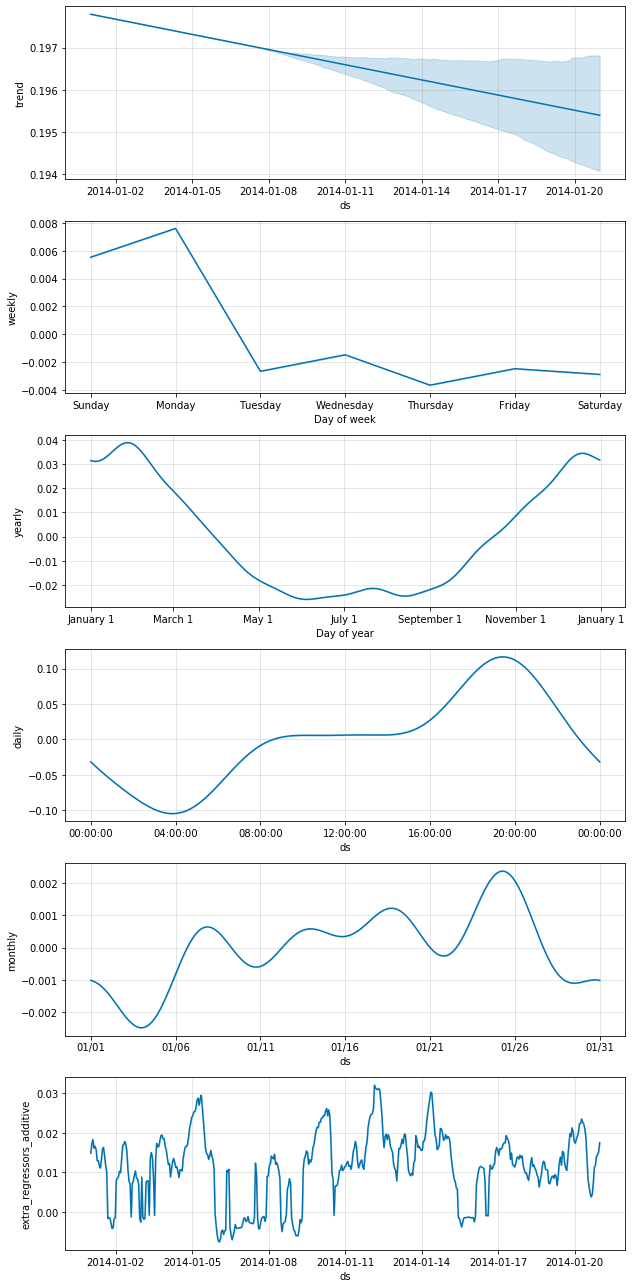

In [122]:
modelAll.plot_components(forecastAll)